In [11]:
# imports pandas and matplot
import pandas as pd

%matplotlib inline

In [12]:
# imports csv 
firearm = pd.read_csv("firearm-seizures-data.csv")

In [13]:
# drops any data that does not have a neighborhood attatched to it
firearm.dropna(subset = ["neighborhood"], inplace=True)
#firearm.head(5)

In [14]:
# converts total_count to integers
firearm['total_count'] = pd.to_numeric(firearm['total_count'])

In [15]:
# sums up the total_count by neighborhood
firearm_sum = firearm.groupby('neighborhood')['total_count'].sum()

In [16]:
# converts the groupby to a dataframe
fire_final = pd.DataFrame(firearm_sum)

In [17]:
# sets it so it will display all the rows
pd.set_option('display.max_rows', None)

In [18]:
# sorts it in ascending order
fire_final = fire_final.sort_values(['total_count', 'neighborhood'], ascending=[1, 0])

In [24]:
print(fire_final)

                           total_count
neighborhood                          
Lincoln Place                        1
Oakwood                              2
West End                             3
Summer Hill                          3
Regent Square                        3
Mt. Oliver                           3
Esplen                               4
Chartiers City                       4
Hays                                 5
Friendship                           5
St. Clair                            7
Fairywood                            7
Banksville                           7
Westwood                             8
Polish Hill                          8
Mount Oliver Borough                 8
Windgap                              9
Stanton Heights                      9
South Shore                          9
Squirrel Hill North                 10
Spring Garden                       10
Arlington Heights                   10
North Oakland                       11
Bon Air                  

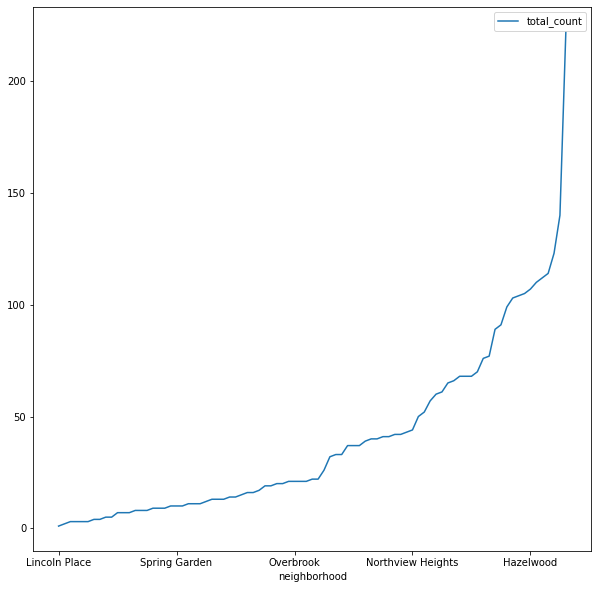

In [54]:
fire_final.plot(figsize=(10,10))